## We install Dependencies

In [1]:
# pip install pandas

# pip install requests

# pip install -r requirements.txt

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import datetime

In [3]:
df = pd.read_json('https://api.covid19india.org/v4/timeseries.json')

## We create a "new" dataset.

In [4]:
# We obtaining the first date to the max date, current_date.
current_date = max(df['AP']['dates']) # We obtain the current date.
dates = list(df['AP']['dates'])
min_date = dates[0]

## How to obtain the Graph

You can replace the confirmed in the temp_list.append(df[i]['dates'][date]['total'][confirmed]) with data like deceased,recovered,tested. Also you can replace total with delta.

In [5]:
df['AP']['dates'][current_date]['total']

{'confirmed': 2066450,
 'deceased': 14373,
 'recovered': 2047722,
 'tested': 29518787,
 'vaccinated1': 32976969,
 'vaccinated2': 20375181}

In [6]:
data_selected = 'deceased' # We replace confirmed with data you want to get.
def obtain_data_for_a_date(date):
    temp_list = []
    for i in df.columns:
        try:
            # We also replace confirmed with the data you want to get.
            temp_list.append(df[i]['dates'][date]['total'][data_selected])
        except:
            temp_list.append(0)
    return temp_list

In [7]:
# We obtain a dataframe for confirmed results.
d = {}
for j in dates:
    d[j] = obtain_data_for_a_date(j)

In [8]:
df2 = pd.DataFrame.from_dict(d,orient='index',columns = df.columns);

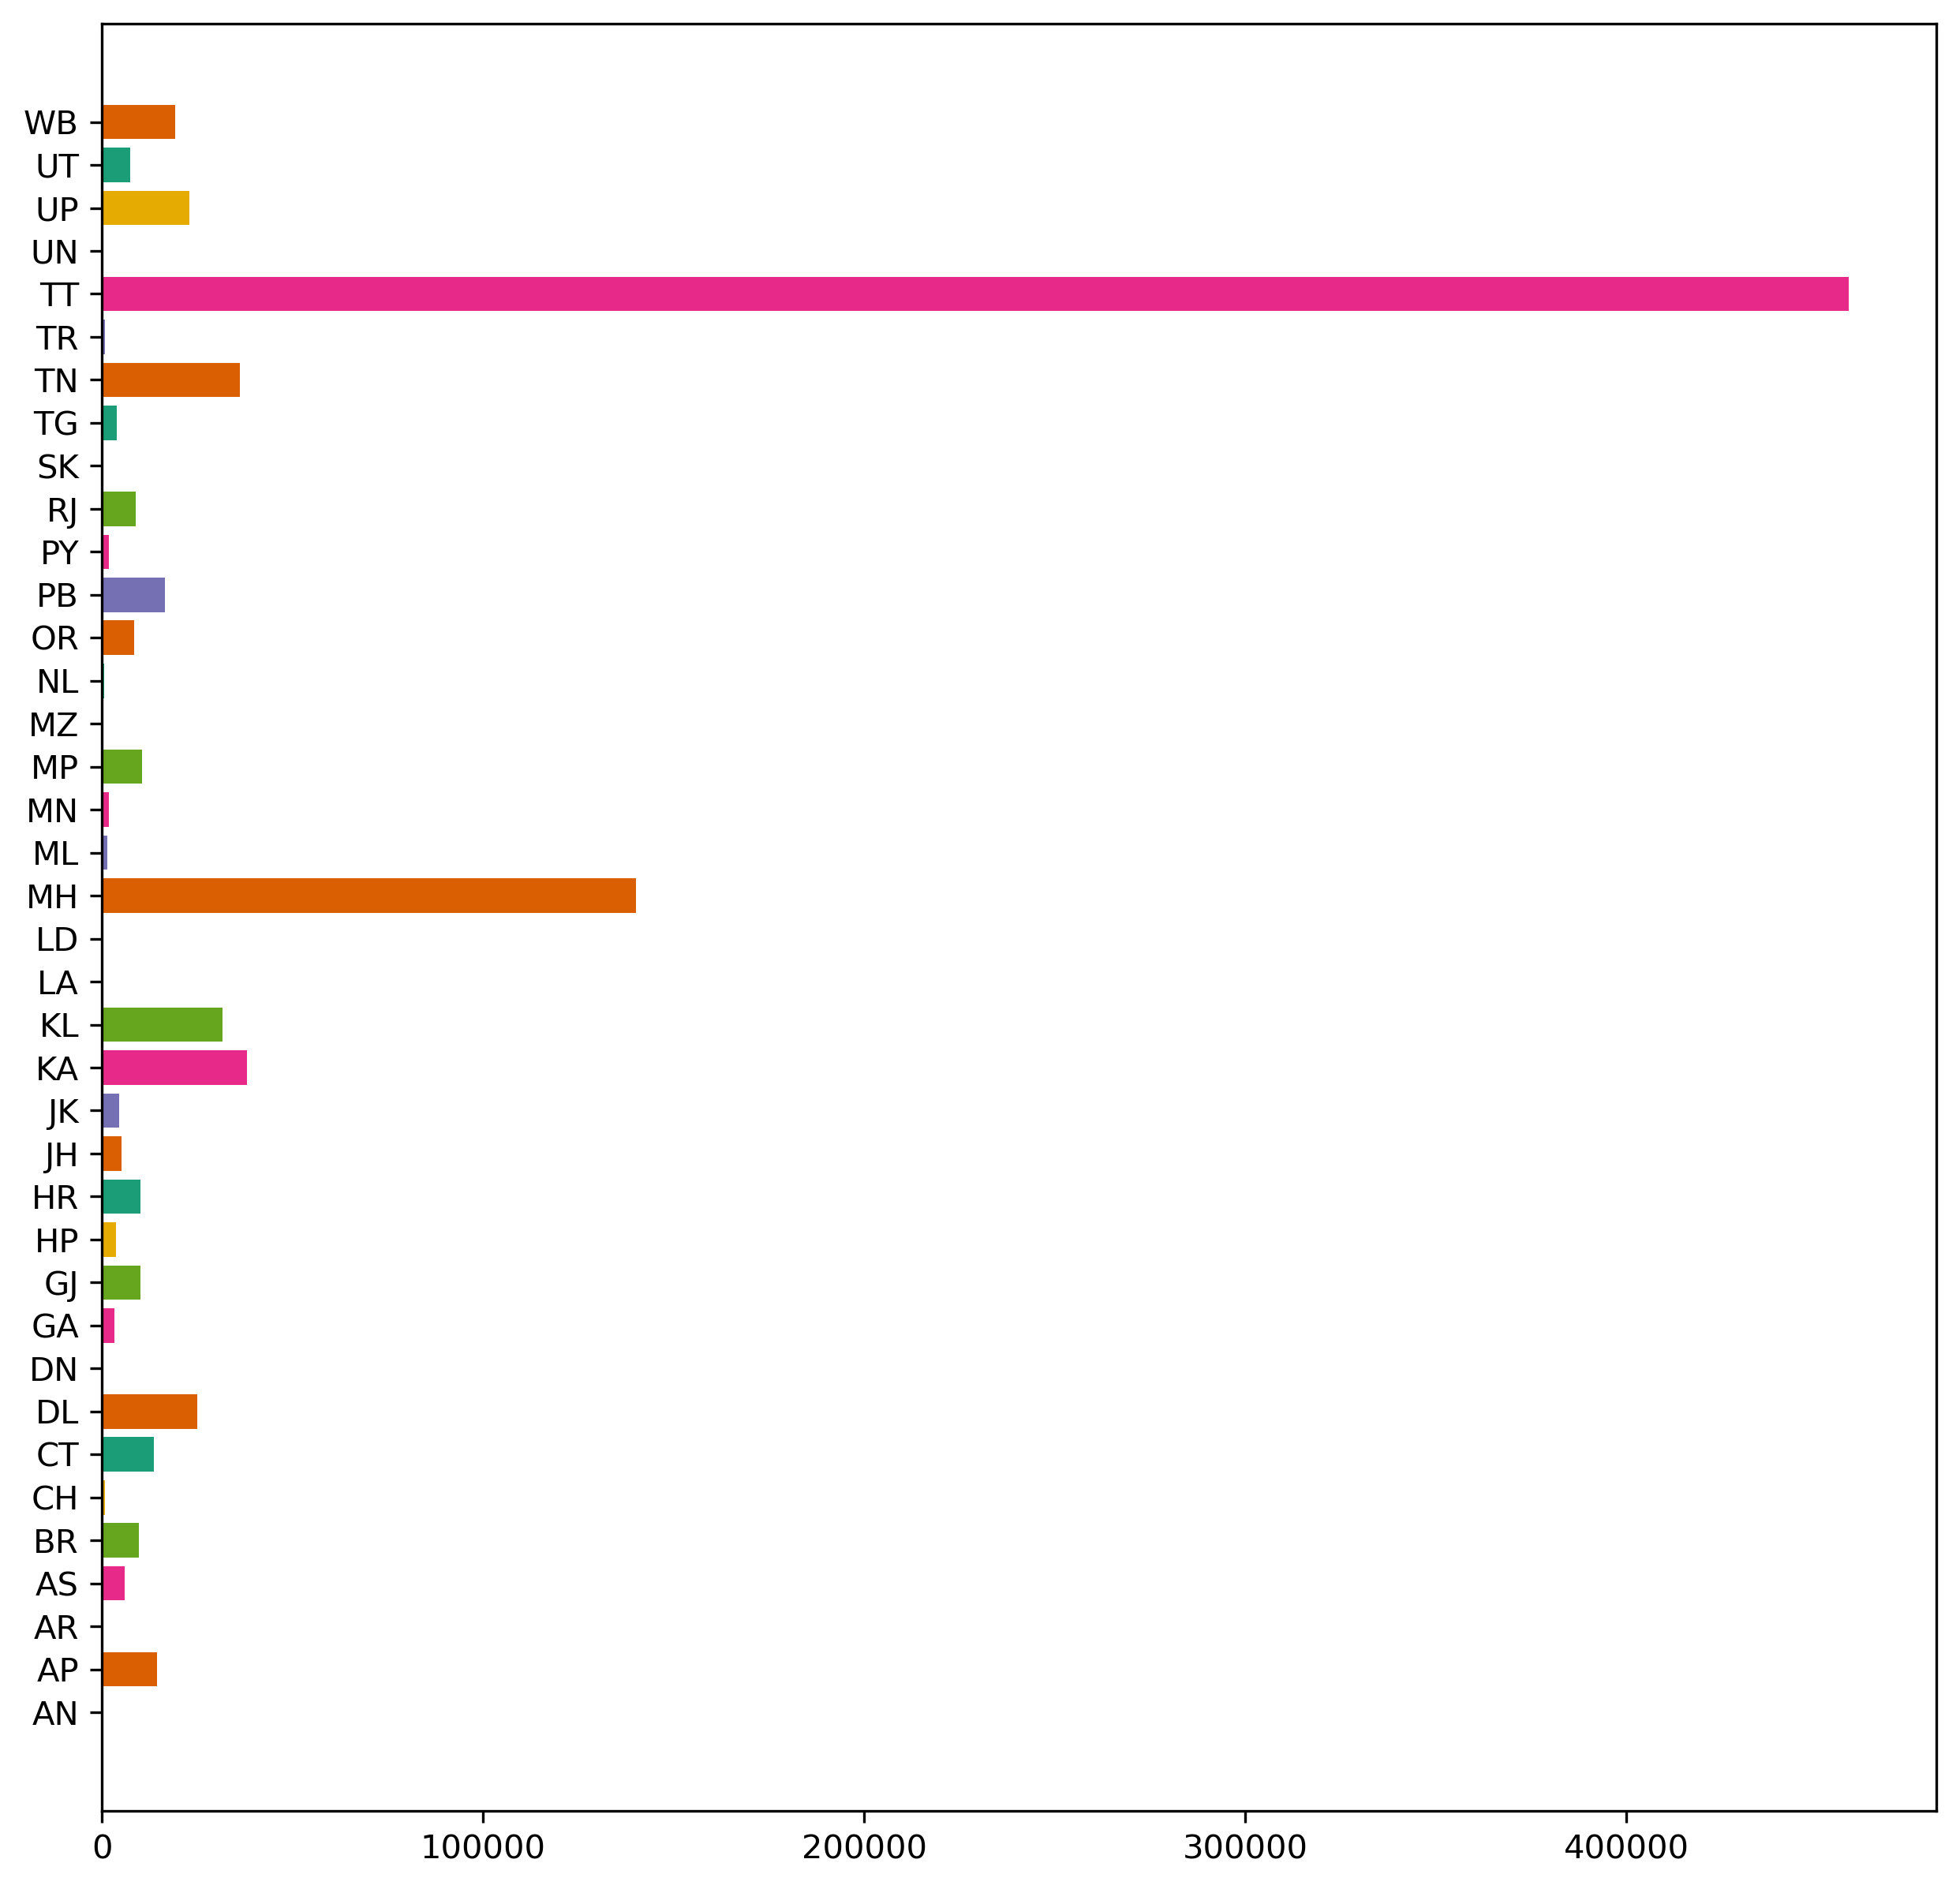

In [9]:
# We test the dataset.
s = df2.loc[current_date];

fig, ax = plt.subplots(figsize=(10,10), dpi=300)
colors = plt.cm.Dark2(range(6))
y = s.index
width = s.values
ax.barh(y=y, width=width, color=colors);

def nice_axes(ax):
    ax.set_facecolor('.8')
    ax.tick_params(labelsize=8, length=0)
    ax.grid(True, axis='x', color='white')
    ax.set_axisbelow(True)
    [spine.set_visible(False) for spine in ax.spines.values()]

## Arranging, Ranking & Interploating the "data set

In [10]:
# Test run
# We create new dataset called df3 and arranging the index.
df3 = df2.loc[min_date:current_date]
df3 = df3.reset_index()
df3.index = df3.index * 5
last_idx = df3.index[-1] + 1

df_expanded = df3.reindex(range(last_idx))
df_expanded['index'] = df_expanded['index'].fillna(method='ffill')
df_expanded = df_expanded.set_index('index')

df_rank_expanded = df_expanded.rank(axis=1, method='first')
df_expanded = df_expanded.interpolate()
df_rank_expanded = df_rank_expanded.interpolate()

In [11]:
def prepare_data(df, steps=5):
    df = df3.reset_index()
    df.index = df3.index * steps
    last_idx = df3.index[-1] + 1
    df_expanded = df3.reindex(range(last_idx))
    df_expanded['index'] = df_expanded['index'].fillna(method='ffill')
    df_expanded = df_expanded.set_index('index')
    df_rank_expanded = df_expanded.rank(axis=1, method='first')
    df_expanded = df_expanded.interpolate()
    df_rank_expanded = df_rank_expanded.interpolate()
    return df_expanded, df_rank_expanded

df_expanded, df_rank_expanded = prepare_data(df3)
df_expanded.head();

## Animation Function

[Source](https://medium.com/dunder-data/create-a-bar-chart-race-animation-in-python-with-matplotlib-477ed1590096)

In [12]:
from matplotlib.animation import FuncAnimation

def init():
    ax.clear()
    nice_axes(ax)
    ax.set_ylim(.2, 6.8)

def update(i):
    labels = df_expanded.columns
    for bar in ax.containers:
        bar.remove()
    y = df_rank_expanded.iloc[i]
    width = df_expanded.iloc[i]
    ax.barh(y=y, width=width, color=colors, tick_label=labels)
    date_str = df_expanded.index[i]
    # add a proper title in 'remove' data_selected
    ax.set_title(f'{data_selected}- {date_str}', fontsize='smaller')
    
fig = plt.Figure(figsize=(5, 5), dpi=300)
ax = fig.add_subplot()
anim = FuncAnimation(fig=fig, func=update, init_func=init, frames=len(df_expanded), 
                     interval=100, repeat=False)

In [13]:
from IPython.display import HTML
html = anim.to_html5_video()
HTML(html)

## We save the file

We also include the path you want inside the brackets anim.save(path).

In [20]:
#anim.save('Downloads/racing_barchart_animation/racing.mp4')

[A guide to creating animated bar charts](https://medium.com/dunder-data/create-a-bar-chart-race-animation-in-python-with-matplotlib-477ed1590096)